<a href="https://colab.research.google.com/github/MatDawit/AI4ALL/blob/jackie-ver/startuprandomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest Classification Model**

`Goal`: successfully predict closed (0) or still operating (1) status

In [ ]:
import pandas as pd

# importing the dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('df.csv')

Saving df.csv to df (1).csv


In [23]:
# importing more libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [24]:
# selecting features (x) and the target (y)
input = ['funding_total_usd', 'country_code', 'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at']
x = dataset[input].copy()
y = dataset['status']

# converting date columns to datetime objects and then to a numerical format
x.loc[:, 'founded_at'] = pd.to_datetime(x['founded_at'], errors='coerce').astype('int64') // 10**9
x.loc[:, 'first_funding_at'] = pd.to_datetime(x['first_funding_at'], errors='coerce').astype('int64') // 10**9
x.loc[:, 'last_funding_at'] = pd.to_datetime(x['last_funding_at'], errors='coerce').astype('int64') // 10**9

# converting country_code to a numerical format using hot encoding
x = pd.get_dummies(x, columns=['country_code'], prefix='country')

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Had to convert founded_at, first_funding_at, and last_funding_at to numerical dates and country_code to hot encoding to allow for the model to be able to utilize those features to predict accurately.

In [25]:
# making the random forest classification model
# there are 100 trees in this random forest to ensure the model classifies with the most information possible
# and 42 as the random state to ensure reproductability of results
model = RandomForestClassifier(n_estimators=100, random_state=42)

# training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# using test data to predict
modelpredict = model.predict(X_test)

In [27]:
modelpredict

array([1, 1, 0, ..., 1, 1, 1])

Classification

`Failed (0)`: closed

`Successful (1)`: ipo, acquired, operating

In [28]:
print("Accuracy:", accuracy_score(y_test, modelpredict))
print("Confusion Matrix:\n", confusion_matrix(y_test, modelpredict))
print("Classification Report:\n", classification_report(y_test, modelpredict))

Accuracy: 0.9844091360476663
Confusion Matrix:
 [[ 1140   254]
 [   60 18686]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      1394
           1       0.99      1.00      0.99     18746

    accuracy                           0.98     20140
   macro avg       0.97      0.91      0.94     20140
weighted avg       0.98      0.98      0.98     20140



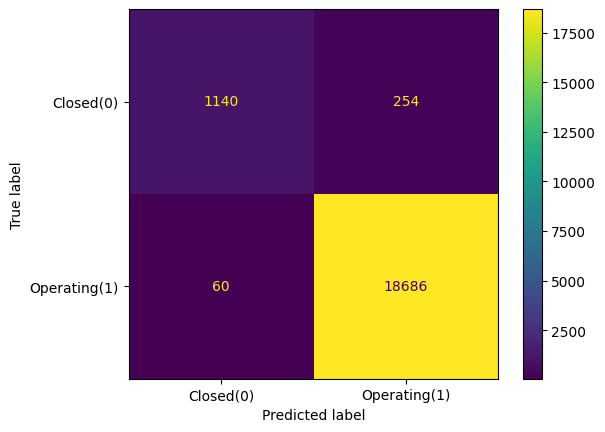

In [30]:
# visualizing accuracy
cm_visualization = ConfusionMatrixDisplay(confusion_matrix(y_test, modelpredict), display_labels=['Closed(0)', 'Operating(1)'])
cm_visualization.plot()